In [30]:
'''Iris flower dataset was used in the project and data visualization, 
analysis and accuracy of various models such as logistic regression, SVM, KNN and naive bayes was predicted on the dataset.
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:

df=pd.read_csv(r"D:/ICT/iris_flower.csv")

In [32]:

df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
df.shape

(150, 5)

In [34]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [35]:
print(df.isna().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [36]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
n = len(df[df['species'] == 'Iris-versicolor'])
print("Number of Iris-Versicolor in Dataset:",n)

Number of Iris-Versicolor in Dataset: 50


In [38]:
n1 = len(df[df['species'] == 'Iris-virginica'])
print("Number of Iris-Virginica in Dataset:",n1)

Number of Iris-Virginica in Dataset: 50


In [39]:
n2 = len(df[df['species'] == 'Iris-setosa'])
print("Number of Iris-Setosa in Dataset:",n2)

Number of Iris-Setosa in Dataset: 50


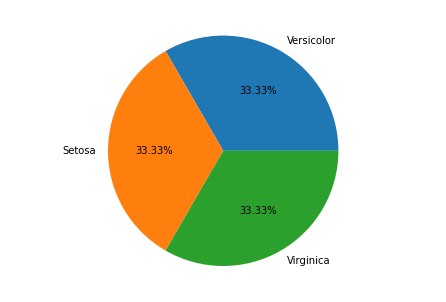

In [40]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

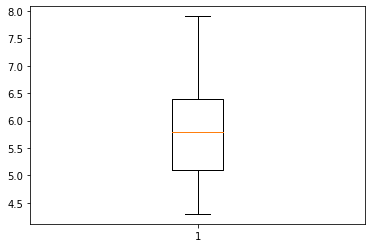

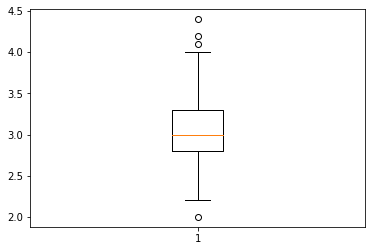

In [41]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.boxplot([df['sepal_length']])
plt.figure(2)
plt.boxplot([df['sepal_width']])
plt.show()

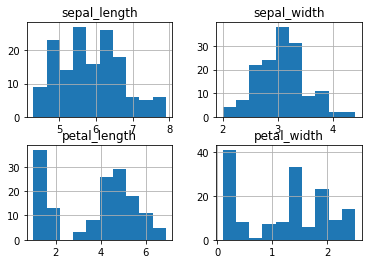

In [42]:
df.hist()
plt.show()

sepal_length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal_width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal_length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal_width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

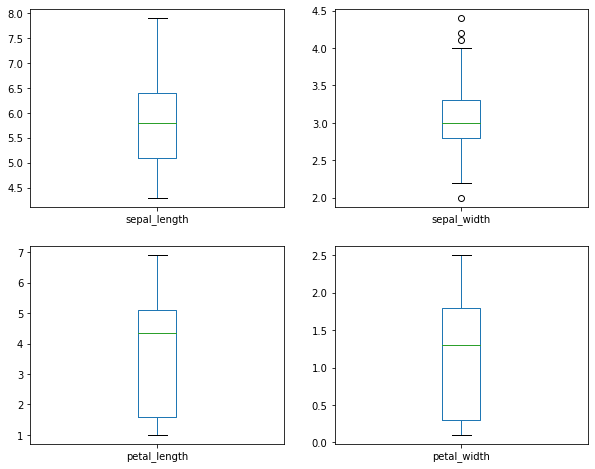

In [43]:
df.plot(kind ='box',subplots = True, layout =(2,2),figsize=(10,8))

In [44]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

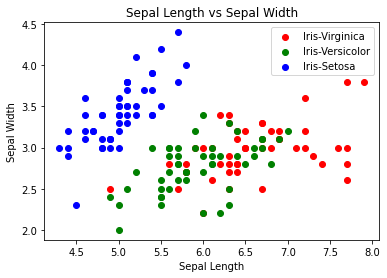

In [45]:

plt.title("Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(X[Y=='Iris-virginica',0],X[Y=='Iris-virginica',1],color='r',label="Iris-Virginica")
plt.scatter(X[Y=='Iris-versicolor',0],X[Y=='Iris-versicolor',1],color='g',label="Iris-Versicolor")
plt.scatter(X[Y=='Iris-setosa',0],X[Y=='Iris-setosa',1],color='b',label="Iris-Setosa")
plt.legend()
plt.show()


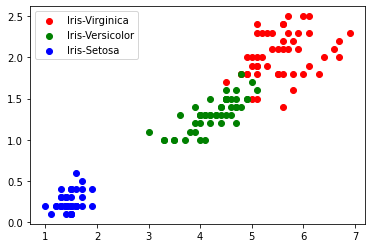

In [46]:
plt.scatter(X[Y=='Iris-virginica',2],X[Y=='Iris-virginica',3],color='r',label="Iris-Virginica")
plt.scatter(X[Y=='Iris-versicolor',2],X[Y=='Iris-versicolor',3],color='g',label="Iris-Versicolor")
plt.scatter(X[Y=='Iris-setosa',2],X[Y=='Iris-setosa',3],color='b',label="Iris-Setosa")
plt.legend()
plt.show()

In [47]:
corr_mat=df.corr()
print (corr_mat)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


In [48]:
import warnings
warnings.filterwarnings(action='ignore')


In [49]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=1)
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, Y_train)
Y_pred = model1.predict(X_test)
from sklearn.metrics import accuracy_score
print ("Accuracy by Logistic Regression: ", accuracy_score(Y_test,Y_pred))

Accuracy by Logistic Regression:  0.9777777777777777


In [50]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(Y_test, Y_pred)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 13]], dtype=int64)

In [51]:
print (classification_report(Y_test, Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [52]:
from sklearn.svm import SVC
model2=SVC()
model2.fit(X_train,Y_train)
Y_pred2=model2.predict(X_test)
print ("Accuracy by SVM: ",accuracy_score(Y_test,Y_pred2))

Accuracy by SVM:  0.9777777777777777


In [53]:
print (confusion_matrix(Y_test, Y_pred2))

[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


In [54]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=3)
model3.fit(X_train,Y_train)
Y_pred3=model3.predict(X_test)
print("Accuracy by KNN: ",accuracy_score(Y_test,Y_pred3))

Accuracy by KNN:  0.9777777777777777


In [55]:
print (confusion_matrix(Y_test, Y_pred3))

[[14  0  0]
 [ 0 18  0]
 [ 0  1 12]]


In [56]:
from sklearn.naive_bayes import GaussianNB
model4=GaussianNB()
model4.fit(X_train,Y_train)
Y_pred4=model4.predict(X_test)
print("Accuracy by Naive Bayes: ",accuracy_score(Y_test,Y_pred4))

Accuracy by Naive Bayes:  0.9333333333333333


In [57]:
print (confusion_matrix(Y_test, Y_pred4))

[[14  0  0]
 [ 0 16  2]
 [ 0  1 12]]


In [62]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','SVM', 'Naive Bayes','KNN'],
    'Accuracy': [0.977,0.977,0.933,0.977]})

result_df = results.sort_values(by='Accuracy', ascending=False)
result_df = result_df.set_index('Accuracy')
result_df.head(10)

,Model
Accuracy,
0.977,Logistic Regression
0.977,SVM
0.977,KNN
0.933,Naive Bayes
